In [285]:
from os import pread

import pandas as pd
import sklearn as sk
import sklearn.metrics
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [286]:
data = pd.read_csv("shop_smart_ecommerce.csv")
df = pd.DataFrame(data)


In [287]:
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [288]:
df["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [289]:
encoder = OrdinalEncoder(
    categories=[['Other', 'New_Visitor', 'Returning_Visitor']]
)

In [290]:
df["VisitorType"] = df["VisitorType"].map({"Returning_Visitor" : 3 , "New_Visitor" : 2 , "Other"  : 1})

In [291]:
df["Month"].describe()

count     12330
unique       10
top         May
freq       3364
Name: Month, dtype: object

In [292]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['Month'] = df['Month'].map(month_map)



In [293]:
df.head(7)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2.0,1,1,1,1,3,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,2,1,2,3,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2.0,4,1,9,3,3,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2.0,3,2,2,4,3,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2.0,3,3,1,4,3,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2.0,2,2,1,3,3,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2.0,2,4,3,3,3,False,False


In [294]:
X = df.iloc[: , :-1]
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,3,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,3,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,3,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,3,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,3,True


In [295]:
y = df.iloc[: , -1]
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [296]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 , stratify=y)

In [297]:
y_train.describe()

count      9864
unique        2
top       False
freq       8338
Name: Revenue, dtype: object

In [298]:
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [299]:
y_pred = cls.predict(X_test)

In [300]:
sk.metrics.f1_score(y_test, y_pred)
print(sk.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.92      0.91      2084
        True       0.52      0.50      0.51       382

    accuracy                           0.85      2466
   macro avg       0.71      0.71      0.71      2466
weighted avg       0.85      0.85      0.85      2466



STANDARD_F1_SCORE : 0.51

***PRE-PRUNING***

In [301]:
max_depth = [2 ,3 , 4 ,5 ,6 ,7 ,8 ,9 ,10]

for depth in max_depth:
    cls = DecisionTreeClassifier(max_depth=depth , random_state=42)
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    print(f"F1 score for {depth} is {sk.metrics.f1_score(y_test, y_pred)}")


F1 score for 2 is 0.5293132328308208
F1 score for 3 is 0.625974025974026
F1 score for 4 is 0.5944272445820433
F1 score for 5 is 0.6430594900849859
F1 score for 6 is 0.6225352112676056
F1 score for 7 is 0.6015037593984962
F1 score for 8 is 0.6005747126436781
F1 score for 9 is 0.5768667642752562
F1 score for 10 is 0.5622254758418741


Best depth value = 6

F1 score for 2 is 0.6225352112676056
F1 score for 3 is 0.6225352112676056
F1 score for 4 is 0.6225352112676056
F1 score for 5 is 0.6225352112676056
F1 score for 6 is 0.6225352112676056
F1 score for 7 is 0.6225352112676056
F1 score for 8 is 0.6225352112676056
F1 score for 9 is 0.6225352112676056
F1 score for 10 is 0.6225352112676056
F1 score for 11 is 0.6225352112676056
F1 score for 12 is 0.6225352112676056


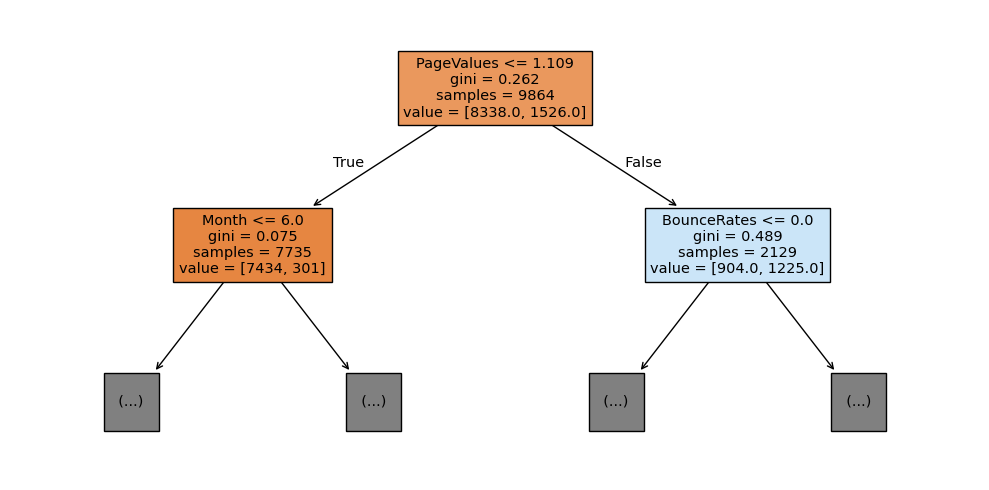

In [302]:
min_sample_split = [2 ,3 , 4 ,5 ,6 ,7 ,8 ,9 ,10 , 11 ,12]


for split in min_sample_split:
    cls = DecisionTreeClassifier(min_samples_split=split , max_depth=6 , random_state=42)
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    print(f"F1 score for {split} is {sk.metrics.f1_score(y_test, y_pred)}")
    if split == 12:
        plt.figure(figsize=[10, 5])
        sk.tree.plot_tree(cls , feature_names=X.columns , filled=True , max_depth = 1)
        plt.tight_layout()
        plt.show()




Best min_sample_split = 12

In [303]:
print(sk.metrics.f1_score(y_test, y_pred))
print(sk.metrics.classification_report(y_test, y_pred))

0.6225352112676056
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2084
        True       0.67      0.58      0.62       382

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.89      0.89      0.89      2466



BEST F1 SCORE BY PRE-PRUNING = **0.62**

***POST-PRUNING***

In [304]:
full_tree = cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

In [305]:
path = full_tree.cost_complexity_pruning_path(X_train , y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 5.06766120e-05 1.01350290e-04 1.27550249e-04
 1.61993968e-04 1.72407467e-04 1.77408753e-04 1.79246290e-04
 1.82335301e-04 1.94659660e-04 2.03856941e-04 2.05959469e-04
 2.69009405e-04 2.76894187e-04 3.55216695e-04 3.56881844e-04
 3.79634269e-04 4.14930295e-04 4.28435417e-04 4.32972435e-04
 4.53932182e-04 4.74348945e-04 5.02328303e-04 5.11874159e-04
 5.14939688e-04 5.45047048e-04 5.55859601e-04 5.73676121e-04
 6.05554815e-04 6.21134868e-04 6.52688953e-04 7.27403919e-04
 7.79727147e-04 9.18273648e-04 1.02799156e-03 1.27285557e-03
 1.32974732e-03 1.99804874e-03 2.11431338e-03 4.00632848e-03
 9.43036429e-03 9.74218476e-02]


In [336]:
trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(max_depth=6 , random_state=42 , ccp_alpha = alpha , min_samples_split  = 12  , class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = model.score(X_test, y_test)
    trees.append((model ,acc))

print(trees)

[(DecisionTreeClassifier(ccp_alpha=np.float64(0.0), class_weight='balanced',
                       max_depth=6, min_samples_split=12, random_state=42), 0.8450932684509327), (DecisionTreeClassifier(ccp_alpha=np.float64(5.0676612033981805e-05),
                       class_weight='balanced', max_depth=6,
                       min_samples_split=12, random_state=42), 0.8450932684509327), (DecisionTreeClassifier(ccp_alpha=np.float64(0.00010135028982595957),
                       class_weight='balanced', max_depth=6,
                       min_samples_split=12, random_state=42), 0.8450932684509327), (DecisionTreeClassifier(ccp_alpha=np.float64(0.00012755024862519653),
                       class_weight='balanced', max_depth=6,
                       min_samples_split=12, random_state=42), 0.8450932684509327), (DecisionTreeClassifier(ccp_alpha=np.float64(0.00016199396804351777),
                       class_weight='balanced', max_depth=6,
                       min_samples_split=12, rando

In [361]:
best_model = DecisionTreeClassifier(class_weight='balanced' , max_depth=6 , min_samples_split=12 , random_state=42 , ccp_alpha = 0.1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(best_model.score( X_test, y_test))
print(sk.metrics.classification_report(y_test, y_pred))

0.8690186536901865
              precision    recall  f1-score   support

       False       0.96      0.89      0.92      2084
        True       0.55      0.78      0.65       382

    accuracy                           0.87      2466
   macro avg       0.76      0.83      0.78      2466
weighted avg       0.89      0.87      0.88      2466



**BEST F1 COMBINED SCORE : 0.65**

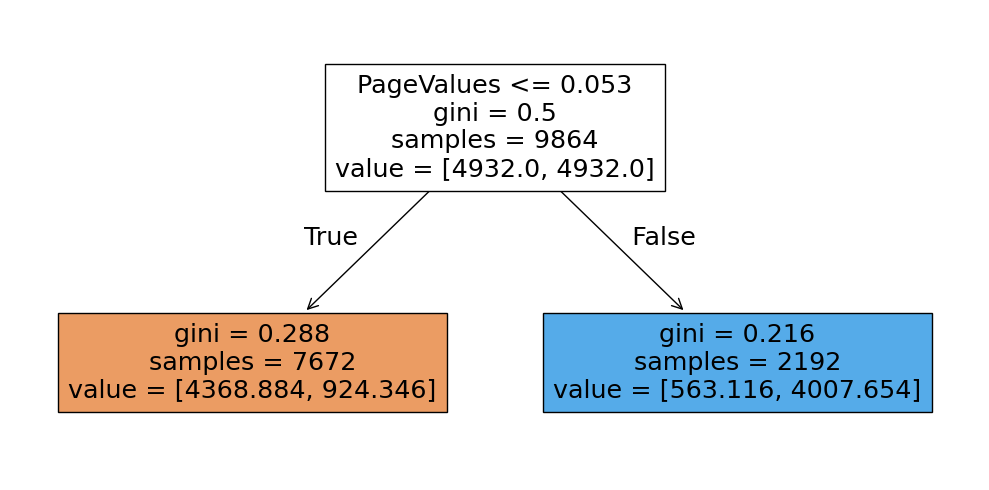

In [340]:
plt.figure(figsize=[10, 5])
sk.tree.plot_tree(best_model , feature_names=X.columns , filled=True)
plt.tight_layout()
plt.show()

***FINAL METRICS***

In [362]:
y_pred = best_model.predict(X_test)

print(sk.metrics.classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       False       0.96      0.89      0.92      2084
        True       0.55      0.78      0.65       382

    accuracy                           0.87      2466
   macro avg       0.76      0.83      0.78      2466
weighted avg       0.89      0.87      0.88      2466



In [363]:
print(sk.metrics.confusion_matrix(y_test, y_pred))

[[1845  239]
 [  84  298]]
